In [1]:
from pyforest import *
lazy_imports()

['import torch',
 'from sklearn.linear_model import Ridge',
 'from sklearn.impute import SimpleImputer',
 'import fastai',
 'from sklearn.preprocessing import StandardScaler',
 'import awswrangler as wr',
 'from sklearn.model_selection import GridSearchCV',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'from sklearn.linear_model import LinearRegression',
 'from sklearn import metrics',
 'from fbprophet import Prophet',
 'from sklearn.preprocessing import MinMaxScaler',
 'from sklearn.preprocessing import RobustScaler',
 'import lightgbm as lgb',
 'import pickle',
 'from sklearn.model_selection import StratifiedKFold',
 'import cv2',
 'import numpy as np',
 'import plotly.express as px',
 'from sklearn.decomposition import PCA',
 'import glob',
 'import pandas as pd',
 'import spacy',
 'from sklearn.manifold import TSNE',
 'from sklearn.cluster import KMeans',
 'from sklearn.linear_model import LogisticRegression',
 'from sklearn.ensemble import GradientBoostingClassi

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv')
print(df.shape)
df.head()

<IPython.core.display.Javascript object>

(768, 9)


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Features:

# Preg: no. of pregnancy
# Plas: Plasma
# Pres: Blood Pressure
# skin: Skin thickness
# test: Insulin test
# mass: Body mass
# pedi: Diabetes pedigree function
# age: age
# class: target(whether diabetes or not, 1:diabetic,
#                                       0:not diabetic)

In [3]:
# Checking if the dataset has any null value

df.isnull().values.any()

False

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
columns = list(df)[0:-1]
columns

['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age']

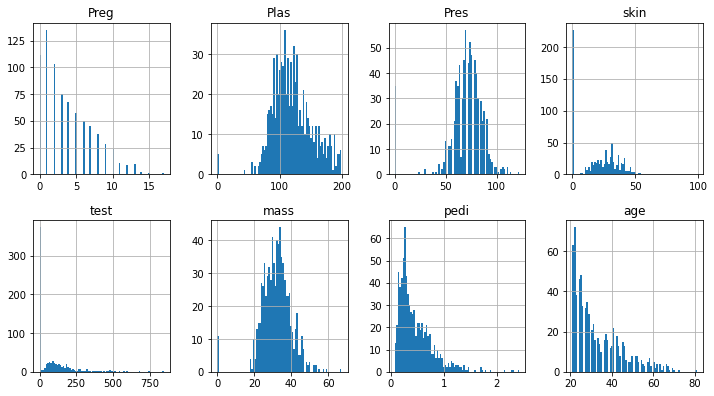

In [12]:
df[columns].hist(bins=80, figsize=(12,50), layout=(14,4));
#plt.show()

In [13]:
# Looking for correlation in the dataset

df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000
